# Project Mini Python Kelompok 5

##### Topik : Sorting Hasil Penjualan
## Judul : Hasil Penjualan Rumah Makan Ayam Geprek

In [40]:
# Anggota Kelompok :
# 121400082	Phoenix Bintang Assura
# 122400044	MUHAMMAD HAIKAL AKBAR
# 123400032	Lusitania Fachria Salsabila

## Masukan Data-set

In [41]:
import csv

In [42]:
import csv

def load_data():
    try:
        with open("makan.csv", "r", encoding="utf-8-sig") as file: #  encoding="utf-8-sig" dipake biar header excel otomatis ilang, agar file dibaca normal
            reader = csv.DictReader(file, delimiter=';') # delimiter buat ngilangin ";;;" dari file csv (sama biar file csv kebaca normal)
            return list(reader)
    except FileNotFoundError:
        print("File tidak ditemukan.")
        return []

## Membuat Menu

In [43]:
def tampilkan_menu():
    print("\n=== MENU ===")
    print("1. Tampilkan semua data")
    print("2. Sorting Data Penjualan")
    print("3. Lihat ringkasan penjualan")
    print("4. Visualisasi pendapatan")
    print("5. Keluar")
    # menu dari program yang ingin dibuat

## Data Urut pendapatan

In [44]:
class Penjualan:
    def __init__(self, tanggal, barang, jumlah, pendapatan):
        self.Tanggal = tanggal
        self.Barang = barang
        self.Jumlah = int(jumlah)
        self.Pendapatan = int(pendapatan)

    def __repr__(self):
        return f"{self.Tanggal} | {self.Barang} | {self.Jumlah} | {self.Pendapatan}"
        ## class penjualan dibutuhin buat misahin mana tanggal, barang, jumlah, dan pendapatan

In [45]:
def Tampilkan_urutan_pendapatan():

    def load_data():
        try:
            with open("makan.csv", "r", encoding="utf-8-sig") as file:
                reader = csv.DictReader(file, delimiter=';')
                return [
                    Penjualan(d["Tanggal"], d["Barang"], d["Jumlah"], d["Pendapatan"])
                    for d in reader
                ]
        except FileNotFoundError:
            print("File tidak ditemukan.")
            return []

    data = load_data()

    # urutan data dari paling gede ke paling kecil
    data_urut = sorted(data, key=lambda x: int(x.Pendapatan), reverse=True)

    print("\n=== Data Berdasarkan Pendapatan (Tertinggi → Terendah) ===")
    for d in data_urut:
        print(d)

## Membuat Ringkasan

In [46]:
import json

In [47]:
def ringkasan_penjualan():
    data = load_data()
    if not data:
        return

    # mencari total dan rata rata transaksi
    total_pendapatan = sum(int(d["Pendapatan"]) for d in data)
    total_transaksi = len(data)
    rata_rata = total_pendapatan / total_transaksi

    # mencari barang terlaris
    barang_count = {}  # ← Tambahkan ini

    for d in data:
        barang = d["Barang"]
        barang_count[barang] = barang_count.get(barang, 0) + int(d["Jumlah"])

    barang_terlaris = max(barang_count, key=barang_count.get)

    ringkasan = {
        "total_pendapatan": total_pendapatan,
        "total_transaksi": total_transaksi,
        "rata_rata": rata_rata,
        "barang_terlaris": barang_terlaris,
    }

    print("\n=== RINGKASAN ===")
    for k, v in ringkasan.items():
        print(f"{k}: {v}")

    # Buat file json dari ringkasan
    with open("ringkasan.json", "w") as f:
        json.dump(ringkasan, f, indent=4)

    print("Ringkasan disimpan ke ringkasan.json")


## Membuat Grafik

In [48]:
import matplotlib.pyplot as plt

In [49]:
def visualisasi_penjualan():
    data = load_data()
    if not data:
        return
    # kelompokkan pendapatan per tanggal
    pendapatan_per_tgl = {}
    for d in data:
        tgl = d["Tanggal"]
        pendapatan_per_tgl[tgl] = pendapatan_per_tgl.get(tgl, 0) + int(d["Pendapatan"])

    # Bagian Plotting (mempercantik graph )
    plt.figure(figsize=(8,5))
    plt.plot(list(pendapatan_per_tgl.keys()), list(pendapatan_per_tgl.values()), marker="o")
    plt.xlabel("Tanggal")
    plt.ylabel("Pendapatan")
    plt.title("Grafik Pendapatan Harian")
    plt.grid(True)
    plt.show()

## Membuat Input Pengguna


=== MENU ===
1. Tampilkan semua data
2. Sorting Data Penjualan
3. Lihat ringkasan penjualan
4. Visualisasi pendapatan
5. Keluar


Pilih menu (1-5):  1


{'Tanggal': '06/12/2025', 'Barang': 'Ayam geprek', 'Jumlah': '5', 'Pendapatan': '60000'}
{'Tanggal': '06/12/2025', 'Barang': 'Nasi Kulit', 'Jumlah': '5', 'Pendapatan': '75000'}
{'Tanggal': '06/12/2025', 'Barang': 'Indomie', 'Jumlah': '5', 'Pendapatan': '25000'}
{'Tanggal': '06/12/2025', 'Barang': 'Es The', 'Jumlah': '5', 'Pendapatan': '15000'}
{'Tanggal': '07/12/2025', 'Barang': 'Indomie', 'Jumlah': '10', 'Pendapatan': '50000'}
{'Tanggal': '07/12/2025', 'Barang': 'Ayam geprek', 'Jumlah': '3', 'Pendapatan': '36000'}
{'Tanggal': '07/12/2025', 'Barang': 'Es The', 'Jumlah': '8', 'Pendapatan': '24000'}
{'Tanggal': '08/12/2025', 'Barang': 'Ayam geprek', 'Jumlah': '8', 'Pendapatan': '96000'}
{'Tanggal': '08/12/2025', 'Barang': 'Nasi Kulit', 'Jumlah': '3', 'Pendapatan': '45000'}
{'Tanggal': '08/12/2025', 'Barang': 'Indomie', 'Jumlah': '3', 'Pendapatan': '15000'}
{'Tanggal': '08/12/2025', 'Barang': 'Es The', 'Jumlah': '9', 'Pendapatan': '27000'}
{'Tanggal': '09/12/2025', 'Barang': 'Ayam geprek'

Pilih menu (1-5):  2



=== Data Berdasarkan Pendapatan (Tertinggi → Terendah) ===
08/12/2025 | Ayam geprek | 8 | 96000
10/12/2025 | Ayam geprek | 7 | 84000
06/12/2025 | Nasi Kulit | 5 | 75000
06/12/2025 | Ayam geprek | 5 | 60000
07/12/2025 | Indomie | 10 | 50000
08/12/2025 | Nasi Kulit | 3 | 45000
10/12/2025 | Indomie | 8 | 40000
07/12/2025 | Ayam geprek | 3 | 36000
08/12/2025 | Es The | 9 | 27000
06/12/2025 | Indomie | 5 | 25000
07/12/2025 | Es The | 8 | 24000
06/12/2025 | Es The | 5 | 15000
08/12/2025 | Indomie | 3 | 15000
10/12/2025 | Es The | 5 | 15000
09/12/2025 | Ayam geprek | 1 | 12000

=== MENU ===
1. Tampilkan semua data
2. Sorting Data Penjualan
3. Lihat ringkasan penjualan
4. Visualisasi pendapatan
5. Keluar


Pilih menu (1-5):  3



=== RINGKASAN ===
total_pendapatan: 619000
total_transaksi: 15
rata_rata: 41266.666666666664
barang_terlaris: Es The
Ringkasan disimpan ke ringkasan.json

=== MENU ===
1. Tampilkan semua data
2. Sorting Data Penjualan
3. Lihat ringkasan penjualan
4. Visualisasi pendapatan
5. Keluar


Pilih menu (1-5):  4


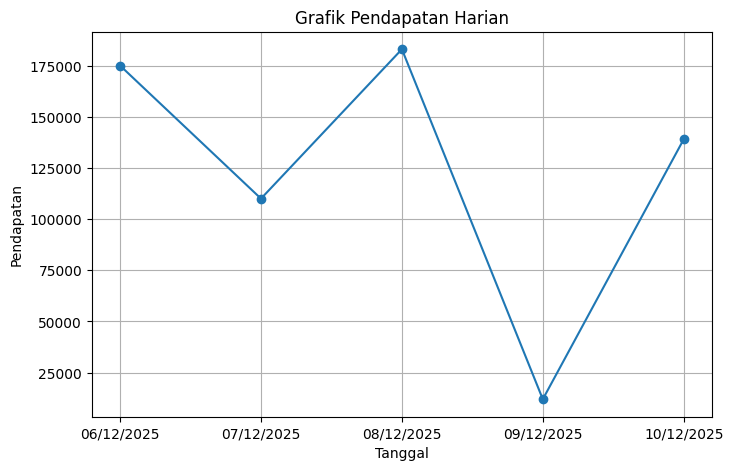


=== MENU ===
1. Tampilkan semua data
2. Sorting Data Penjualan
3. Lihat ringkasan penjualan
4. Visualisasi pendapatan
5. Keluar


Pilih menu (1-5):  5


Program selesai.


In [50]:
while True:
    tampilkan_menu()
    pilihan = input("Pilih menu (1-5): ")

    if pilihan == "1":
        for row in load_data():
            print(row)

    elif pilihan == "2":
        Tampilkan_urutan_pendapatan()

    elif pilihan == "3":
        ringkasan_penjualan()

    elif pilihan == "4":
        visualisasi_penjualan()

    elif pilihan == "5":
        print("Program selesai.")
        break

    else:
        print("Menu tidak valid!")

## bagian ini digunakan untuk meminta input user untuk memanggil fungsi fungsi yang sudah dibuat sebelumnya